In [3]:
import pandas as pd

file_path = r"C:/Users/Ripon/Desktop/python assignment/FIFA World Cup 1930-2022 All Match Dataset.csv"

# Try using a different encoding
try:
    data = pd.read_csv(file_path, encoding='ISO-8859-1')
except UnicodeDecodeError:
    # If ISO-8859-1 doesn't work, try 'cp1252'
    data = pd.read_csv(file_path, encoding='cp1252')

# Display the first few rows of the dataset
print(data.head())

# Show summary information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())


   Key Id Tournament Id      tournament Name   Match Id  \
0       1       WC-1930  1930 FIFA World Cup  M-1930-01   
1       2       WC-1930  1930 FIFA World Cup  M-1930-02   
2       3       WC-1930  1930 FIFA World Cup  M-1930-03   
3       4       WC-1930  1930 FIFA World Cup  M-1930-04   
4       5       WC-1930  1930 FIFA World Cup  M-1930-05   

                Match Name   Stage Name Group Name  Group Stage  \
0          France v Mexico  group stage    Group 1            1   
1  United States v Belgium  group stage    Group 4            1   
2      Yugoslavia v Brazil  group stage    Group 2            1   
3           Romania v Peru  group stage    Group 3            1   
4       Argentina v France  group stage    Group 1            1   

   Knockout Stage  Replayed  ...  Away Team Score Margin Extra Time  \
0               0         0  ...                      -3          0   
1               0         0  ...                      -3          0   
2               0         0  

In [18]:
data.isna().sum()

Key Id                       0
Tournament Id                0
tournament Name              0
Match Id                     0
Match Name                   0
Stage Name                   0
Group Name                   0
Group Stage                  0
Knockout Stage               0
Replayed                     0
Replay                       0
Match Date                   0
Match Time                   0
Stadium Id                   0
Stadium Name                 0
City Name                    0
Country Name                 0
Home Team Id                 0
Home Team Name               0
Home Team Code               0
Away Team Id                 0
Away Team Name               0
Away Team Code               0
Score                        0
Home Team Score              0
Away Team Score              0
Home Team Score Margin       0
Away Team Score Margin       0
Extra Time                   0
Penalty Shootout             0
Score Penalties              0
Home Team Score Penalties    0
Away Tea

In [1]:
#EDA
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


#Model
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [4]:
print("Column names in the dataset:", data.columns)

# Display the first few rows of the dataset to understand its structure
print(data.head())


Column names in the dataset: Index(['Key Id', 'Tournament Id', 'tournament Name', 'Match Id', 'Match Name',
       'Stage Name', 'Group Name', 'Group Stage', 'Knockout Stage', 'Replayed',
       'Replay', 'Match Date', 'Match Time', 'Stadium Id', 'Stadium Name',
       'City Name', 'Country Name', 'Home Team Id', 'Home Team Name',
       'Home Team Code', 'Away Team Id', 'Away Team Name', 'Away Team Code',
       'Score', 'Home Team Score', 'Away Team Score', 'Home Team Score Margin',
       'Away Team Score Margin', 'Extra Time', 'Penalty Shootout',
       'Score Penalties', 'Home Team Score Penalties',
       'Away Team Score Penalties', 'Result', 'Home Team Win', 'Away Team Win',
       'Draw'],
      dtype='object')
   Key Id Tournament Id      tournament Name   Match Id  \
0       1       WC-1930  1930 FIFA World Cup  M-1930-01   
1       2       WC-1930  1930 FIFA World Cup  M-1930-02   
2       3       WC-1930  1930 FIFA World Cup  M-1930-03   
3       4       WC-1930  1930 FIFA

In [5]:
data['Match Date'] = pd.to_datetime(data['Match Date'])

In [6]:
data

,Key Id,Tournament Id,tournament Name,Match Id,Match Name,Stage Name,Group Name,Group Stage,Knockout Stage,Replayed,...,Away Team Score Margin,Extra Time,Penalty Shootout,Score Penalties,Home Team Score Penalties,Away Team Score Penalties,Result,Home Team Win,Away Team Win,Draw
0,1,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,group stage,Group 1,1,0,0,...,-3,0,0,0-0,0,0,home team win,1,0,0
1,2,WC-1930,1930 FIFA World Cup,M-1930-02,United States v Belgium,group stage,Group 4,1,0,0,...,-3,0,0,0-0,0,0,home team win,1,0,0
2,3,WC-1930,1930 FIFA World Cup,M-1930-03,Yugoslavia v Brazil,group stage,Group 2,1,0,0,...,-1,0,0,0-0,0,0,home team win,1,0,0
3,4,WC-1930,1930 FIFA World Cup,M-1930-04,Romania v Peru,group stage,Group 3,1,0,0,...,-2,0,0,0-0,0,0,home team win,1,0,0
4,5,WC-1930,1930 FIFA World Cup,M-1930-05,Argentina v France,group stage,Group 1,1,0,0,...,-1,0,0,0-0,0,0,home team win,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,960,WC-2022,2022 FIFA World Cup,M-2022-60,England v France,quarter-finals,not applicable,0,1,0,...,1,0,0,0-0,0,0,away team win,0,1,0
960,961,WC-2022,2022 FIFA World Cup,M-2022-61,Argentina v Croatia,semi-finals,not applicable,0,1,0,...,-3,0,0,0-0,0,0,home team win,1,0,0
961,962,WC-2022,2022 FIFA World Cup,M-2022-62,France v Morocco,semi-finals,not applicable,0,1,0,...,-2,0,0,0-0,0,0,home team win,1,0,0
962,963,WC-2022,2022 FIFA World Cup,M-2022-63,Croatia v Morocco,third-place match,not applicable,0,1,0,...,-1,0,0,0-0,0,0,home team win,1,0,0


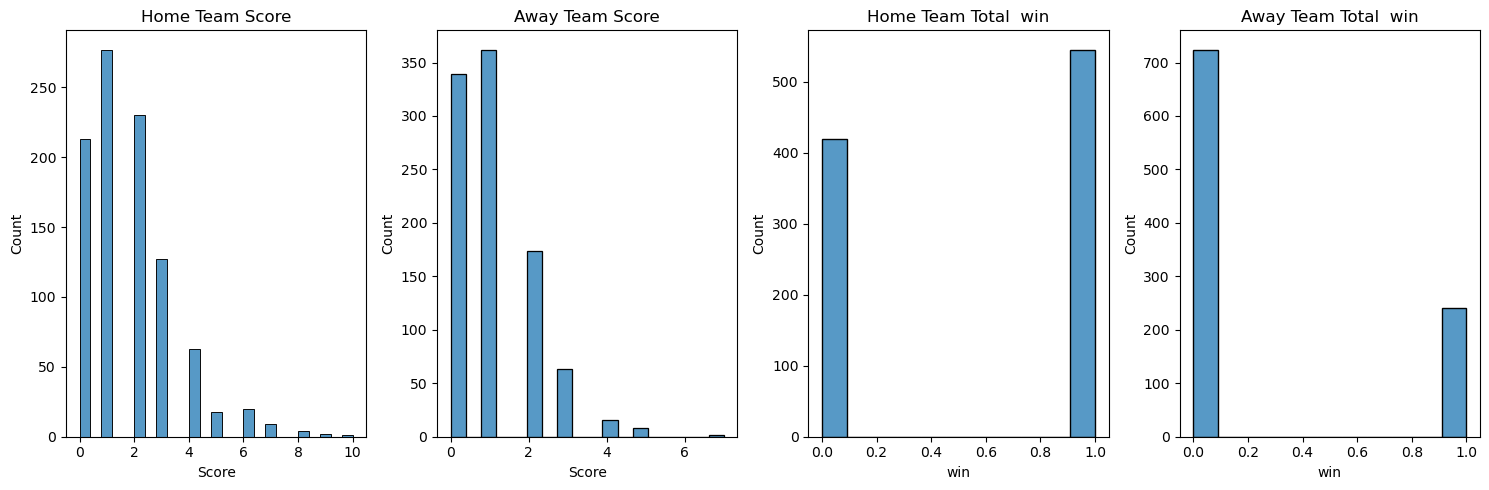

In [4]:
fig, axs = plt.subplots(ncols=4, figsize=(15, 5))
sns.histplot(data['Home Team Score'], ax=axs[0], kde=False)
sns.histplot(data['Away Team Score'], ax=axs[1], kde=False)
sns.histplot(data['Home Team Win'], ax=axs[2], kde=False)
sns.histplot(data['Away Team Win'], ax=axs[3], kde=False)

# Set titles and axis labels
axs[0].set(title='Home Team Score', xlabel='Score')
axs[1].set(title='Away Team Score', xlabel='Score')
axs[2].set(title='Home Team Total  win', xlabel='win')
axs[3].set(title='Away Team Total  win', xlabel='win')

# Adjust spacing between subplots
plt.tight_layout()


In [ ]:
data.shape

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Key Id                     964 non-null    int64 
 1   Tournament Id              964 non-null    object
 2   tournament Name            964 non-null    object
 3   Match Id                   964 non-null    object
 4   Match Name                 964 non-null    object
 5   Stage Name                 964 non-null    object
 6   Group Name                 964 non-null    object
 7   Group Stage                964 non-null    int64 
 8   Knockout Stage             964 non-null    int64 
 9   Replayed                   964 non-null    int64 
 10  Replay                     964 non-null    int64 
 11  Match Date                 964 non-null    object
 12  Match Time                 964 non-null    object
 13  Stadium Id                 964 non-null    object
 14  Stadium Na

In [5]:
data.describe()

,Key Id,Group Stage,Knockout Stage,Replayed,Replay,Home Team Score,Away Team Score,Home Team Score Margin,Away Team Score Margin,Extra Time,Penalty Shootout,Home Team Score Penalties,Away Team Score Penalties,Home Team Win,Away Team Win,Draw
count,964.00000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000
mean,482.50000,0.744813,0.255187,0.004149,0.004149,1.766598,1.054979,0.711618,-0.711618,0.075726,0.036307,0.121369,0.108921,0.565353,0.248963,0.185685
std,278.42713,0.436192,0.436192,0.064315,0.064315,1.601040,1.071720,1.925893,1.925893,0.264697,0.187150,0.665731,0.600764,0.495968,0.432637,0.389054
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,241.75000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,482.50000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,723.25000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,964.00000,1.000000,1.000000,1.000000,1.000000,10.000000,7.000000,9.000000,7.000000,1.000000,1.000000,5.000000,5.000000,1.000000,1.000000,1.000000


In [6]:
data.columns

Index(['Key Id', 'Tournament Id', 'tournament Name', 'Match Id', 'Match Name',
       'Stage Name', 'Group Name', 'Group Stage', 'Knockout Stage', 'Replayed',
       'Replay', 'Match Date', 'Match Time', 'Stadium Id', 'Stadium Name',
       'City Name', 'Country Name', 'Home Team Id', 'Home Team Name',
       'Home Team Code', 'Away Team Id', 'Away Team Name', 'Away Team Code',
       'Score', 'Home Team Score', 'Away Team Score', 'Home Team Score Margin',
       'Away Team Score Margin', 'Extra Time', 'Penalty Shootout',
       'Score Penalties', 'Home Team Score Penalties',
       'Away Team Score Penalties', 'Result', 'Home Team Win', 'Away Team Win',
       'Draw'],
      dtype='object')

In [7]:
data.dtypes

Key Id                        int64
Tournament Id                object
tournament Name              object
Match Id                     object
Match Name                   object
Stage Name                   object
Group Name                   object
Group Stage                   int64
Knockout Stage                int64
Replayed                      int64
Replay                        int64
Match Date                   object
Match Time                   object
Stadium Id                   object
Stadium Name                 object
City Name                    object
Country Name                 object
Home Team Id                 object
Home Team Name               object
Home Team Code               object
Away Team Id                 object
Away Team Name               object
Away Team Code               object
Score                        object
Home Team Score               int64
Away Team Score               int64
Home Team Score Margin        int64
Away Team Score Margin      

In [8]:
data['Match Date'] = pd.to_datetime(data['Match Date'])

In [12]:
data

,Key Id,Tournament Id,tournament Name,Match Id,Match Name,Stage Name,Group Name,Group Stage,Knockout Stage,Replayed,...,Away Team Score Margin,Extra Time,Penalty Shootout,Score Penalties,Home Team Score Penalties,Away Team Score Penalties,Result,Home Team Win,Away Team Win,Draw
0,1,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,group stage,Group 1,1,0,0,...,-3,0,0,0-0,0,0,home team win,1,0,0
1,2,WC-1930,1930 FIFA World Cup,M-1930-02,United States v Belgium,group stage,Group 4,1,0,0,...,-3,0,0,0-0,0,0,home team win,1,0,0
2,3,WC-1930,1930 FIFA World Cup,M-1930-03,Yugoslavia v Brazil,group stage,Group 2,1,0,0,...,-1,0,0,0-0,0,0,home team win,1,0,0
3,4,WC-1930,1930 FIFA World Cup,M-1930-04,Romania v Peru,group stage,Group 3,1,0,0,...,-2,0,0,0-0,0,0,home team win,1,0,0
4,5,WC-1930,1930 FIFA World Cup,M-1930-05,Argentina v France,group stage,Group 1,1,0,0,...,-1,0,0,0-0,0,0,home team win,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,960,WC-2022,2022 FIFA World Cup,M-2022-60,England v France,quarter-finals,not applicable,0,1,0,...,1,0,0,0-0,0,0,away team win,0,1,0
960,961,WC-2022,2022 FIFA World Cup,M-2022-61,Argentina v Croatia,semi-finals,not applicable,0,1,0,...,-3,0,0,0-0,0,0,home team win,1,0,0
961,962,WC-2022,2022 FIFA World Cup,M-2022-62,France v Morocco,semi-finals,not applicable,0,1,0,...,-2,0,0,0-0,0,0,home team win,1,0,0
962,963,WC-2022,2022 FIFA World Cup,M-2022-63,Croatia v Morocco,third-place match,not applicable,0,1,0,...,-1,0,0,0-0,0,0,home team win,1,0,0


Missing values per column:
Key Id                       0
Tournament Id                0
tournament Name              0
Match Id                     0
Match Name                   0
Stage Name                   0
Group Name                   0
Group Stage                  0
Knockout Stage               0
Replayed                     0
Replay                       0
Match Date                   0
Match Time                   0
Stadium Id                   0
Stadium Name                 0
City Name                    0
Country Name                 0
Home Team Id                 0
Home Team Name               0
Home Team Code               0
Away Team Id                 0
Away Team Name               0
Away Team Code               0
Score                        0
Home Team Score              0
Away Team Score              0
Home Team Score Margin       0
Away Team Score Margin       0
Extra Time                   0
Penalty Shootout             0
Score Penalties              0
Home Team Sc

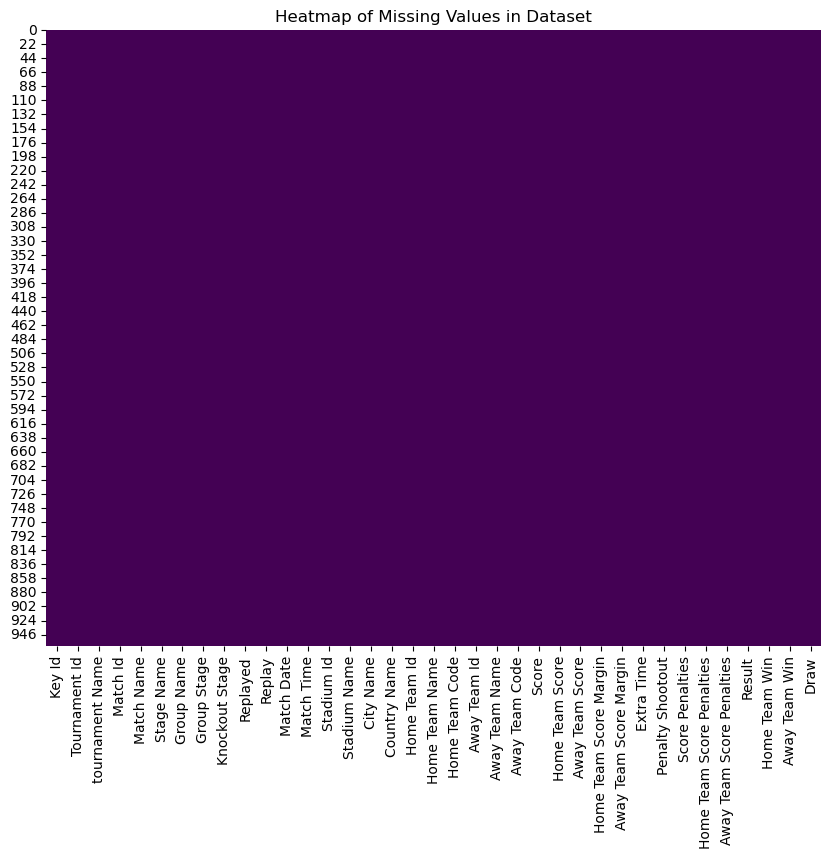

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Check for any missing values in the DataFrame
missing_values_count = data.isna().sum()

# Print the number of missing values for each column
print("Missing values per column:")
print(missing_values_count)

# Check the percentage of missing values per column
missing_percentage = (missing_values_count / len(data)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage)

# Optional: Plotting the missing values
plt.figure(figsize=(10, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Dataset')
plt.show()


In [9]:
data.isna().sum()

Key Id                       0
Tournament Id                0
tournament Name              0
Match Id                     0
Match Name                   0
Stage Name                   0
Group Name                   0
Group Stage                  0
Knockout Stage               0
Replayed                     0
Replay                       0
Match Date                   0
Match Time                   0
Stadium Id                   0
Stadium Name                 0
City Name                    0
Country Name                 0
Home Team Id                 0
Home Team Name               0
Home Team Code               0
Away Team Id                 0
Away Team Name               0
Away Team Code               0
Score                        0
Home Team Score              0
Away Team Score              0
Home Team Score Margin       0
Away Team Score Margin       0
Extra Time                   0
Penalty Shootout             0
Score Penalties              0
Home Team Score Penalties    0
Away Tea

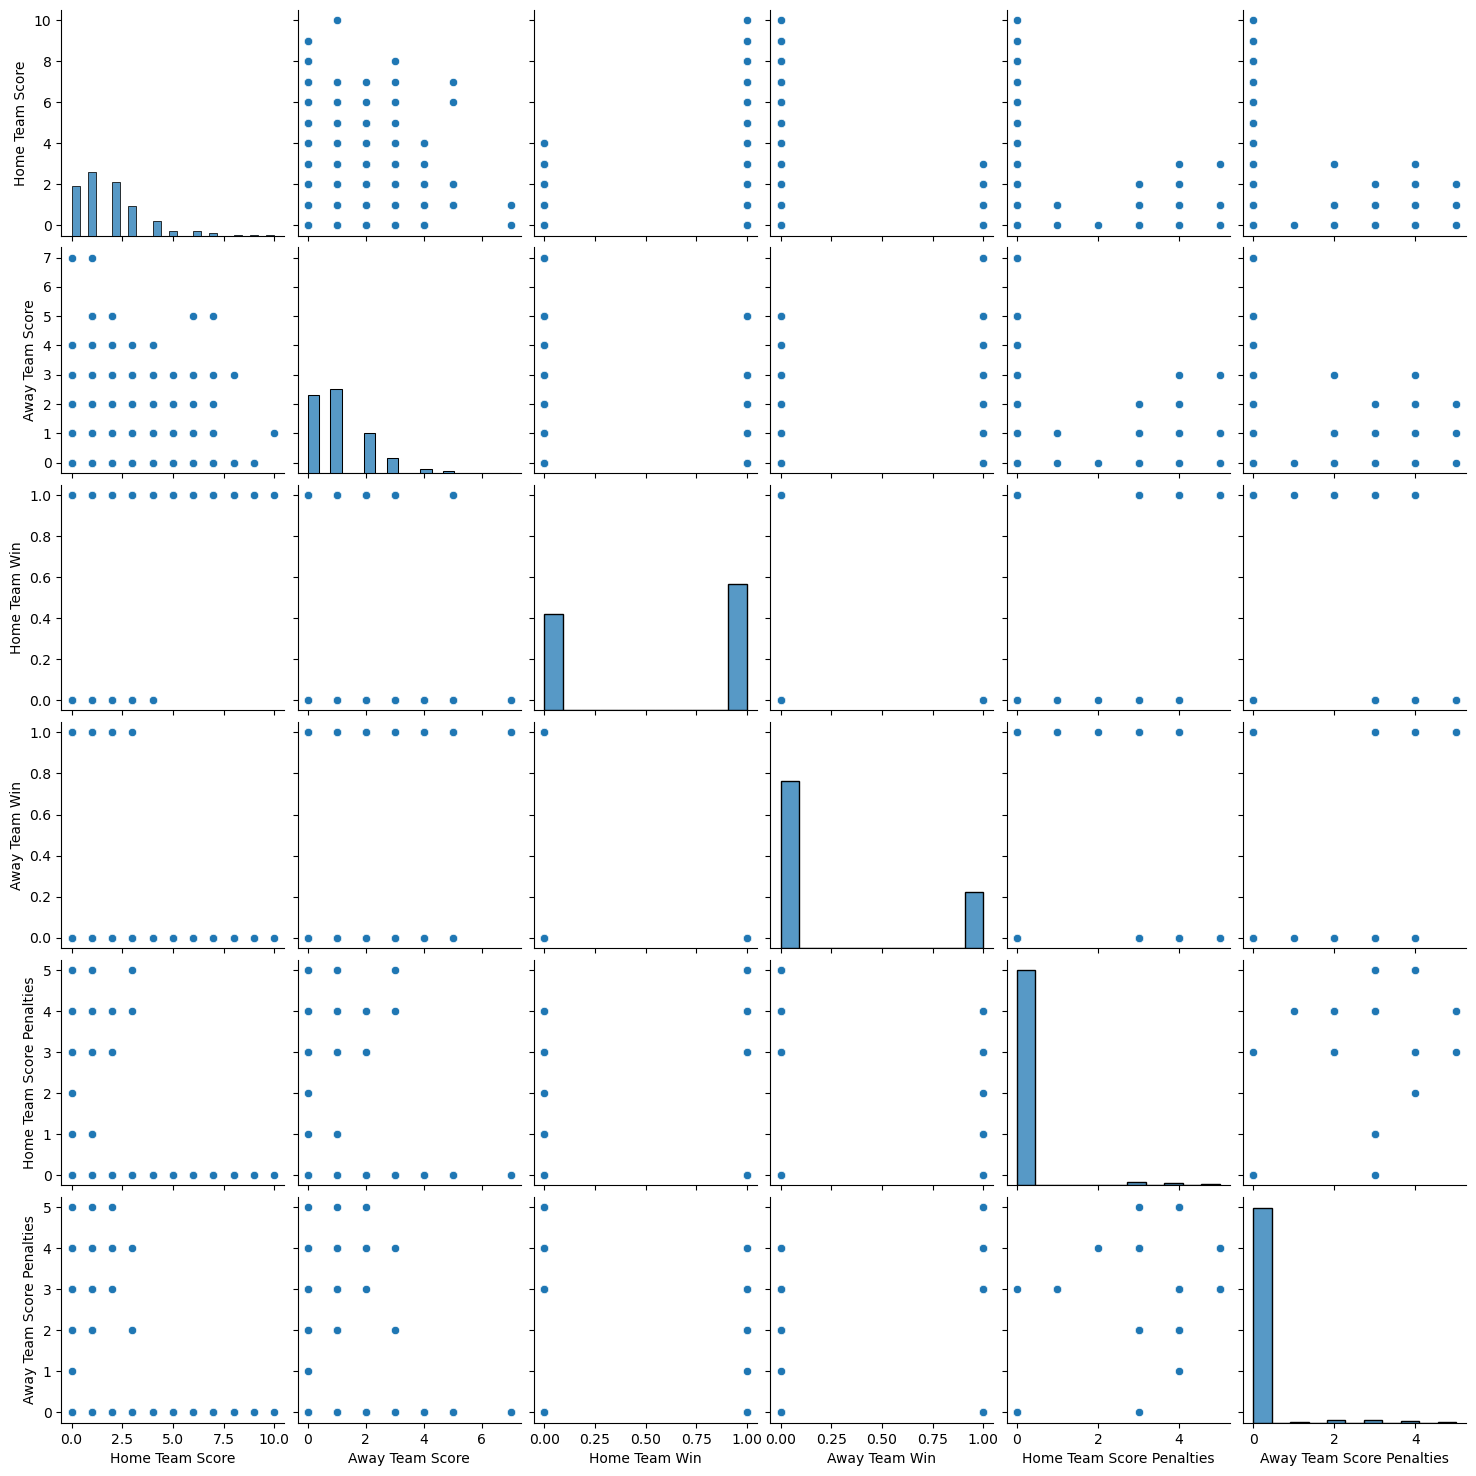

In [11]:
# Relationship between variables
sns.pairplot(data[['Home Team Score', 'Away Team Score', 'Home Team Win', 'Away Team Win', 'Home Team Score Penalties', 'Away Team Score Penalties']])

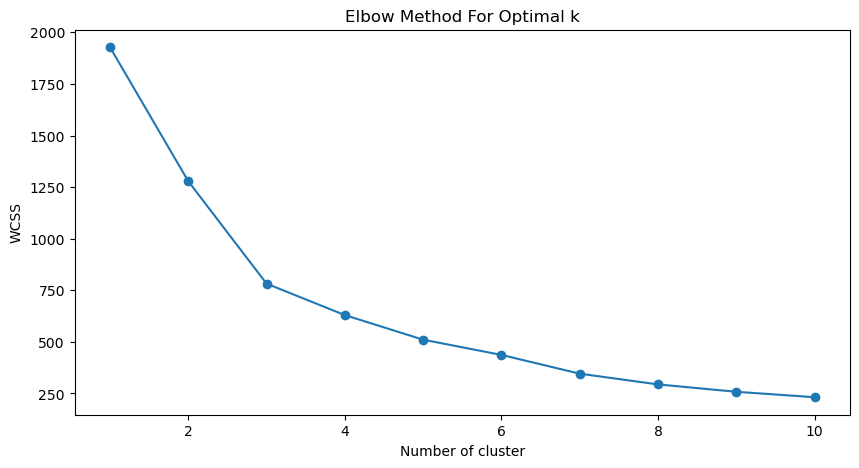

In [37]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Selecting two numerical features for clustering
features = data[['Home Team Score', 'Away Team Score']]

# Handling missing values
features = features.dropna()

# Normalizing the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Running the elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia)

# Plotting the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()


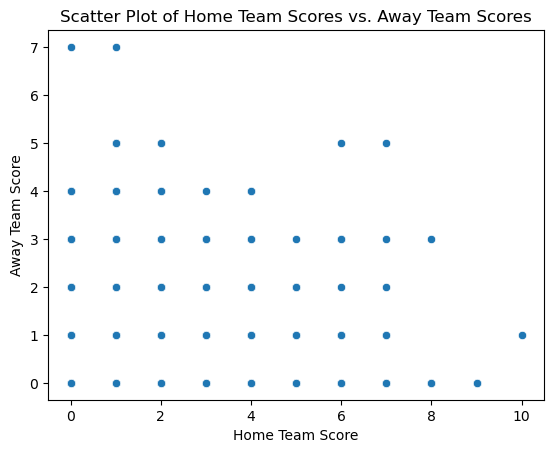

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt



# Create a scatter plot
sns.scatterplot(data=data, x='Home Team Score', y='Away Team Score')

# Add titles and labels
plt.title('Scatter Plot of Home Team Scores vs. Away Team Scores')
plt.xlabel('Home Team Score')
plt.ylabel('Away Team Score')

# Show the plot
plt.show()


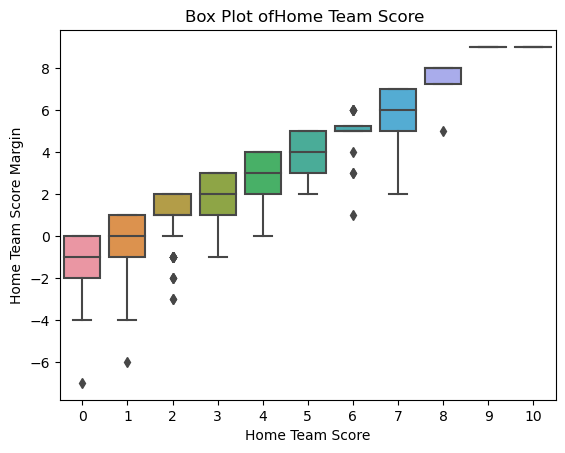

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

#alize

# If 'Match Stage' is to be used as a categorical grouping variable:
sns.boxplot(data=data, x='Home Team Score', y='Home Team Score Margin')
plt.title('Box Plot ofHome Team Score ')
plt.xlabel('Home Team Score')
plt.ylabel('Home Team Score Margin')
plt.show()


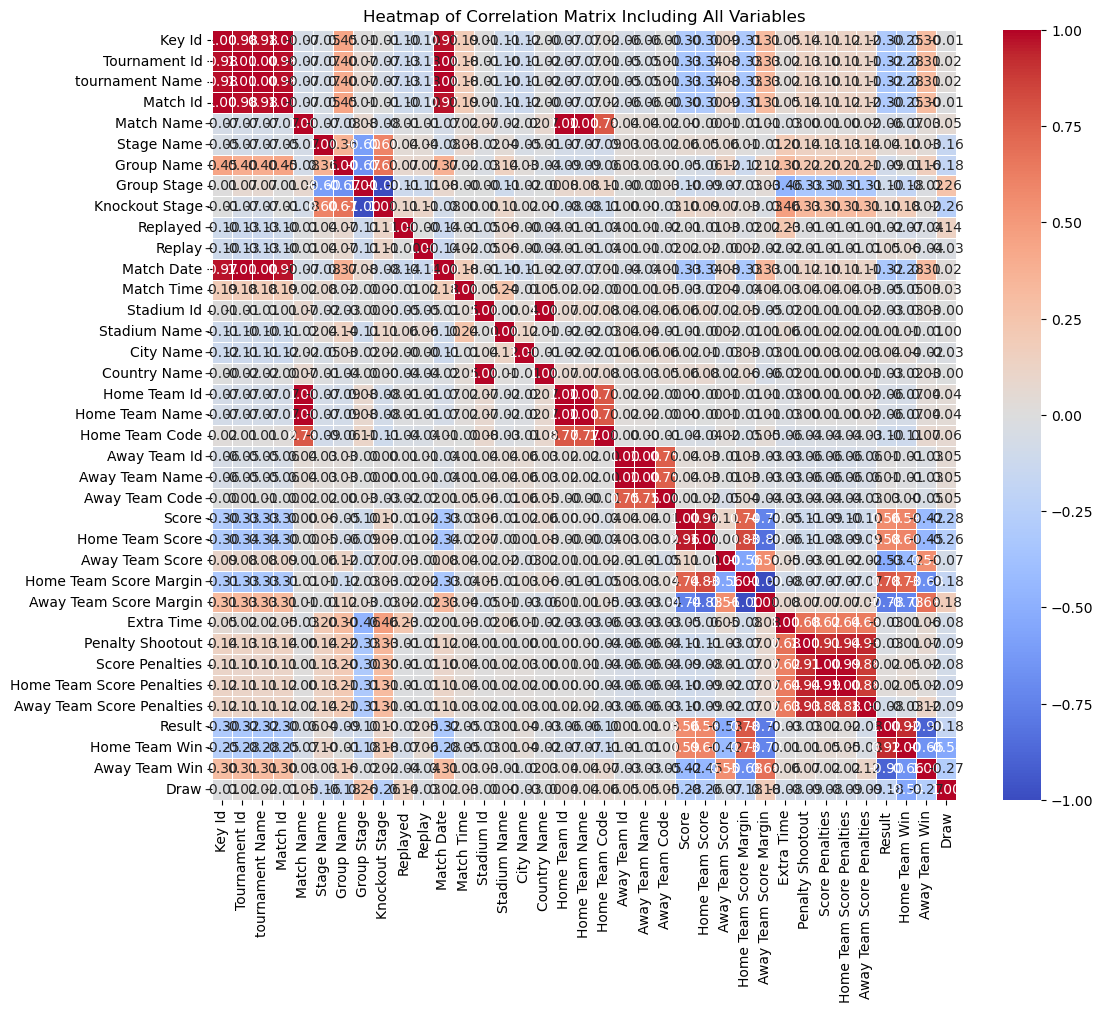

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



# Encode categorical data using LabelEncoder or use pd.get_dummies for one-hot encoding
for column in data.columns:
    if data[column].dtype == 'object':  # Assuming object type for categorical data
        lbl = LabelEncoder()
        data[column] = lbl.fit_transform(data[column].astype(str))

# Calculate the correlation matrix for all variables
correlation_matrix = data.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))  # Larger figure size for better readability
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix Including All Variables')
plt.show()


In [24]:
import pandas as pd


# Select features and target
features = data[['Home Team Score', 'Away Team Score']]
target = data['Home Team Win']

# Handling missing values
features.fillna(features.mean(), inplace=True)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predictions and evaluating the model
log_reg_predictions = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
print(f'Logistic Regression Accuracy: {log_reg_accuracy}')
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions and evaluating the model
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')

Logistic Regression Accuracy: 0.9792746113989638
Random Forest Accuracy: 0.9792746113989638


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset with specific encoding
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Define features and target
features = ['Penalty Shootout', 'Stage Name', 'Group Name']
target = 'Home Team Win'

# Check if the necessary columns exist
if not all(col in data.columns for col in features + [target]):
    raise ValueError("Required columns are missing in the dataset. Please check the dataset and the feature names.")

# Selecting relevant features and target
df = data[features + [target]].dropna()

# Encoding categorical data
df = pd.get_dummies(df, columns=features)

# Check if target is categorical and encode if necessary
if df[target].dtype == 'object':
    df[target] = df[target].astype('category').cat.codes

# Split data into training and test sets
X = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming all data is now categorical and encoded, skip scaling or scale only specific numeric columns if they exist

# Initialize the models
log_reg = LogisticRegression(random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
forest_clf = RandomForestClassifier(random_state=42)

# Train the models
log_reg.fit(X_train, y_train)
tree_clf.fit(X_train, y_train)
forest_clf.fit(X_train, y_train)

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Print accuracy scores
print("Logistic Regression Accuracy:", evaluate_model(log_reg, X_test, y_test))
print("Decision Tree Accuracy:", evaluate_model(tree_clf, X_test, y_test))
print("Random Forest Accuracy:", evaluate_model(forest_clf, X_test, y_test))

# Example of prediction
# Creating a new data point, make sure to include all necessary dummy variable columns from X_train
example_new_data = {
    'Penalty Shootout_Yes': 0, 
    'Penalty Shootout_No': 1, 
    'Stage Name_quarter-finals': 1, 
    # Add all other necessary dummy columns, setting them to 0
    # The following are placeholders and should be replaced with actual column names and correct values
    'Group Name_A': 0, 
    'Group Name_B': 1,
    # Add additional lines here for all other columns
}

# Convert dictionary to DataFrame and align columns
new_data = pd.DataFrame([example_new_data])
new_data = new_data.reindex(columns=X_train.columns, fill_value=0)  # Make sure columns match

# Predict using the logistic regression model
predicted_outcome = log_reg.predict(new_data)
print("Predicted Home Team Win (Logistic Regression):", predicted_outcome)


Logistic Regression Accuracy: 0.6528497409326425
Decision Tree Accuracy: 0.6269430051813472
Random Forest Accuracy: 0.6269430051813472
Predicted Home Team Win (Logistic Regression): [1]


In [27]:
import pandas as pd



# Display descriptive statistics for numeric columns
numeric_descriptive_stats = data.describe()

# Display frequency of each category for categorical columns
categorical_descriptive_stats = data.describe(include=['object'])

# Printing numeric and categorical descriptive statistics
print("Numeric Descriptive Statistics:\n", numeric_descriptive_stats)
print("\nCategorical Descriptive Statistics:\n", categorical_descriptive_stats)




Numeric Descriptive Statistics:
           Key Id  Group Stage  Knockout Stage    Replayed      Replay  \
count  964.00000   964.000000      964.000000  964.000000  964.000000   
mean   482.50000     0.744813        0.255187    0.004149    0.004149   
std    278.42713     0.436192        0.436192    0.064315    0.064315   
min      1.00000     0.000000        0.000000    0.000000    0.000000   
25%    241.75000     0.000000        0.000000    0.000000    0.000000   
50%    482.50000     1.000000        0.000000    0.000000    0.000000   
75%    723.25000     1.000000        1.000000    0.000000    0.000000   
max    964.00000     1.000000        1.000000    1.000000    1.000000   

       Home Team Score  Away Team Score  Home Team Score Margin  \
count       964.000000       964.000000              964.000000   
mean          1.766598         1.054979                0.711618   
std           1.601040         1.071720                1.925893   
min           0.000000         0.000000  

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your dataset - make sure to replace 'path_to_file' with the actual path to your CSV file
import pandas as pd

# Encode categorical data
encoder = LabelEncoder()
data['Stage Name'] = encoder.fit_transform(data['Stage Name'].astype(str))
data['Group Name'] = encoder.fit_transform(data['Group Name'].astype(str))

# Split the data into train and test sets
X = data[['Penalty Shootout', 'Stage Name', 'Group Name']]  # Ensure these column names match your dataset columns
y = data['Home Team Win']  # Adjust this if the target column has a different name
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print performance metrics
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 Score: {:.2f}'.format(f1))


Accuracy: 0.63
Precision: 0.65
Recall: 0.62
F1 Score: 0.64


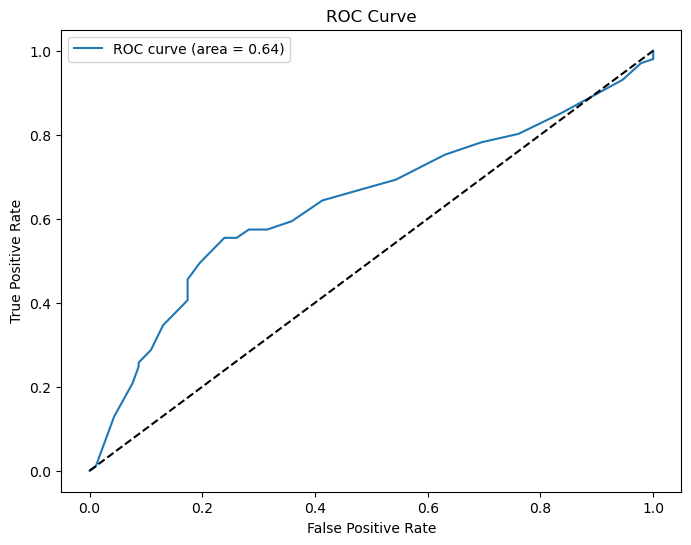

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Split the data into training and testing sets
X, y = data[['Penalty Shootout', 'Stage Name', 'Group Name']], data['Home Team Win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier with specified max_depth
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Create a pipeline with polynomial features and random forest classifier
features = PolynomialFeatures(degree=2)
model = Pipeline([
    ('polynomial_features', features),
    ('random_forest', rfc)
])

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate false positive rate and true positive rate for ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Specify the feature columns and target column
features = ['Penalty Shootout', 'Stage Name', 'Group Name']
target = 'Home Team Win'

# Split the data into features (X) and target (y)
X = data[features]
y = data[target]

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numeric columns (assuming 'Penalty Shootout' is numeric)
numeric_features = ['Penalty Shootout']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical columns (assuming the rest are categorical)
categorical_features = ['Stage Name', 'Group Name']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer to apply the appropriate preprocessing to each column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that executes the preprocessor and then fits the logistic regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the logistic regression model
pipeline.fit(X_train, y_train)

# Predicting the Test set results
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Output the performance metrics
print('Model accuracy:', accuracy)
print('Confusion Matrix:\n', cm)


Model accuracy: 0.6528497409326425
Confusion Matrix:
 [[59 33]
 [34 67]]


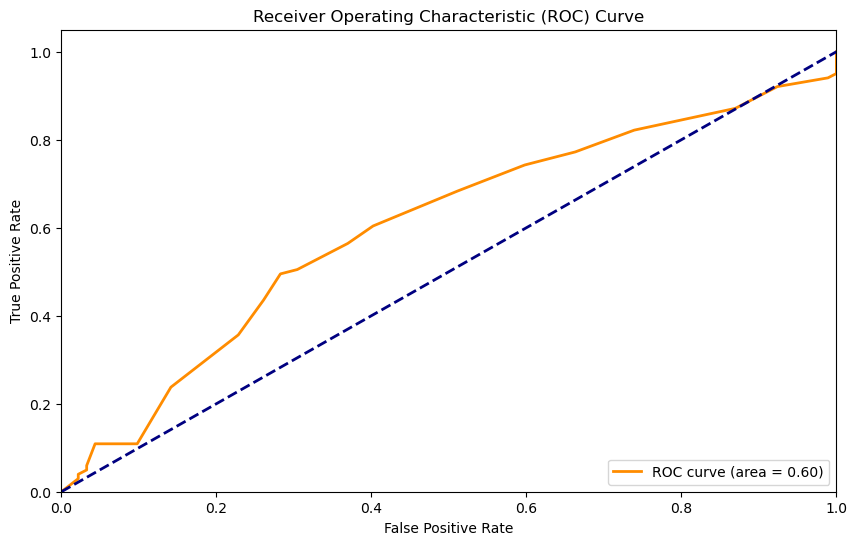

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt



X = data[['Stage Name', 'Group Name']]  # Example feature columns
y = data['Home Team Win']  # Target variable

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create logistic regression model
model = LogisticRegression()

# Fit model on training data
model.fit(X_train, y_train)

# Predict probabilities for the test data
y_probs = model.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


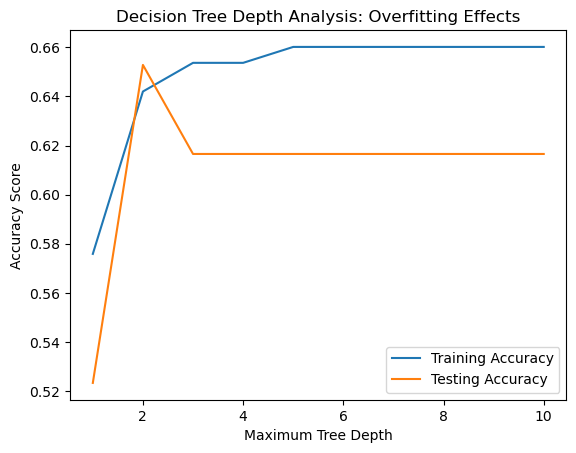

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#

# Define your feature matrix X and target vector y
# Replace 'Feature1', 'Feature2' with actual feature names from your dataset
# Ensure 'Target' is the correct target variable name
X = data[['Stage Name', 'Group Name']]  # Example features
y = data['Home Team Win']                 # Example target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a list to store training and testing accuracy scores for different tree depths
train_acc_scores = []
test_acc_scores = []

# Try different maximum tree depths to check for overfitting
for max_depth in range(1, 11):
    # Train a decision tree classifier with the current maximum depth
    data= DecisionTreeClassifier(max_depth=max_depth)
    data.fit(X_train, y_train)

    # Predict the labels for the training and testing sets
    y_train_pred = data.predict(X_train)
    y_test_pred = data.predict(X_test)

    # Calculate and store the accuracy scores for both the training and testing sets
    train_acc_scores.append(accuracy_score(y_train, y_train_pred))
    test_acc_scores.append(accuracy_score(y_test, y_test_pred))

# Plot the training and testing accuracy scores for different tree depths
plt.plot(range(1, 11), train_acc_scores, label='Training Accuracy')
plt.plot(range(1, 11), test_acc_scores, label='Testing Accuracy')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Accuracy Score')
plt.title('Decision Tree Depth Analysis: Overfitting Effects')
plt.legend()
plt.show()


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Load your data here; make sure the path and file name are correct


# Prepare features using OneHotEncoder
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(data[['Stage Name', 'Group Name']])
X = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out())
y = data['Home Team Win'].astype(int)  # Ensure this column exists and is the correct target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model and calculate accuracy
clf = DecisionTreeClassifier(max_depth=5)  # Adjust depth as needed
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.6424870466321243


Interpretation of Results
An accuracy of 64.25% indicates that the model has a reasonable ability to predict whether the home team will win based on the stage and group of the match. However, whether this accuracy is considered good depends on the complexity of the data and the baseline accuracy . If home teams win significantly more than 64.25% of the matches, then the model might not be adding much value over a simple heuristic of always predicting a home team win. Conversely, if the baseline is lower, the model's predictions provide valuable insights.

Accuracy: 0.65
Precision: 0.67
Recall: 0.66
F1 Score: 0.67


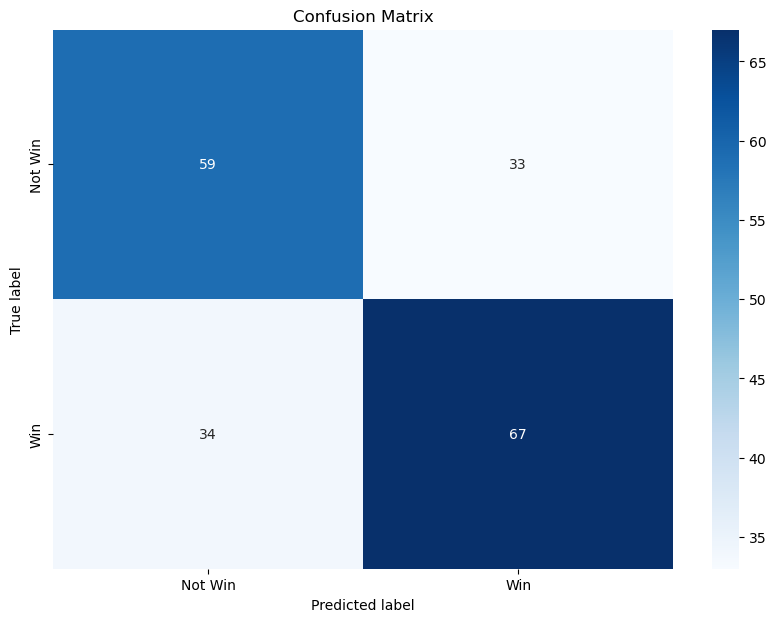

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Specify the feature columns and target column
features = ['Penalty Shootout', 'Stage Name', 'Group Name']  # example features
target = 'Home Team Win'  # example target column

# Split the data into features (X) and target (y)
X = data[features]
y = data[target].astype(int)  # ensure the target is integer

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numeric columns (assuming 'Penalty Shootout' is numeric)
numeric_features = ['Penalty Shootout']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical columns (assuming the rest are categorical)
categorical_features = ['Stage Name', 'Group Name']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer to apply the appropriate preprocessing to each column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that executes the preprocessor and then fits the logistic regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))  # increased max_iter for convergence
])

# Train the logistic regression model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)  # handle zero division scenario
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# Print the evaluation metrics
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Not Win', 'Win'], yticklabels=['Not Win', 'Win'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()
